In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve

from sklearn.metrics import ConfusionMatrixDisplay

In [29]:
train = pd.read_csv('../Data/Paitients_Files_Train.csv')
test = pd.read_csv('../Data/Paitients_Files_Test.csv')

In [30]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


(599, 11)

In [31]:
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [32]:
train['Sepssis'] = train['Sepssis'].replace({'Negative': 0, 'Positive': 1}).astype(int)

C:\Users\NATARAJ\AppData\Local\Temp\ipykernel_15144\3812085644.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sepssis'] = train['Sepssis'].replace({'Negative': 0, 'Positive': 1}).astype(int)


In [33]:
train.groupby('Sepssis').count()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
Sepssis,,,,,,,,,,
0,391,391,391,391,391,391,391,391,391,391
1,208,208,208,208,208,208,208,208,208,208


<Axes: >

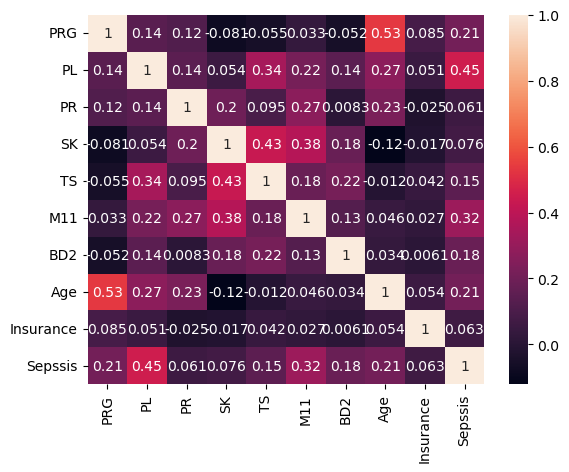

In [34]:
sns.heatmap(train.drop(columns=['ID']).corr(), annot=True)

In [35]:
X = train.drop(['ID','Sepssis'], axis=1)
y = train['Sepssis']

In [36]:
y.value_counts()

Sepssis
0    391
1    208
Name: count, dtype: int64

In [37]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
train_y.shape

(479,)

In [39]:
model_process = Pipeline(
    steps = [ ('imputer', SimpleImputer(strategy='mean') ),
              ('scaler', StandardScaler() ),
              ('model', LogisticRegression() )
    ]
)

In [40]:
model_process.fit(train_x, train_y)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [41]:
train_pred = model_process.predict(train_x)

In [42]:
test_pred = model_process.predict(test_x)

In [43]:
print(f"Train Accuracy : {accuracy_score(train_y, train_pred)}")
print(f"Test Accuracy : {accuracy_score(test_y, test_pred)}")
print("Train Classification Report:")
print(classification_report(train_y, train_pred))
print("Test Classification Report:")
print(classification_report(test_y, test_pred))

Train Accuracy : 0.7724425887265136
Test Accuracy : 0.7416666666666667
Train Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       314
           1       0.71      0.58      0.64       165

    accuracy                           0.77       479
   macro avg       0.75      0.73      0.74       479
weighted avg       0.77      0.77      0.77       479

Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        77
           1       0.66      0.58      0.62        43

    accuracy                           0.74       120
   macro avg       0.72      0.71      0.71       120
weighted avg       0.74      0.74      0.74       120



In [44]:
under_sampled_model = Pipeline(
    steps = [ ('imputer', SimpleImputer(strategy='mean') ),
              ('scaler', StandardScaler() ),
              ('balanced_sampling', RandomUnderSampler()),
              ('model', LogisticRegression() )
    ]
)
under_sampled_model.fit(train_x, train_y)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [45]:
train_pred_sampled = under_sampled_model.predict(train_x)

In [46]:
test_pred_sampled = under_sampled_model.predict(test_x)

In [47]:
print(f"Train Sampled Accuracy : {accuracy_score(train_y, train_pred_sampled)}")
print(f"Test Sampled Accuracy : {accuracy_score(test_y, test_pred_sampled)}")
print("Train Classification Report:")
print(classification_report(train_y, train_pred_sampled))
print("Test Classification Report:")
print(classification_report(test_y, test_pred_sampled))

Train Sampled Accuracy : 0.7682672233820459
Test Sampled Accuracy : 0.7166666666666667
Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       314
           1       0.64      0.77      0.70       165

    accuracy                           0.77       479
   macro avg       0.75      0.77      0.75       479
weighted avg       0.78      0.77      0.77       479

Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        77
           1       0.58      0.72      0.65        43

    accuracy                           0.72       120
   macro avg       0.70      0.72      0.70       120
weighted avg       0.74      0.72      0.72       120



In [48]:
train_pred_sampled_proba = under_sampled_model.predict_proba(train_x)[:,1]
TP_ = []
TN_ = []
FP_ = []
FN_ = []
res = []
for i in np.linspace(0,1,20):
    train_tuned_pred = np.where(train_pred_sampled_proba >= i, 1, 0)
    conf_matr = confusion_matrix(train_y, train_tuned_pred)
    TP = conf_matr[1,1]
    TN = conf_matr[0,0]
    FP = conf_matr[0,1]
    FN = conf_matr[1,0]
    TP_.append(TP)
    TN_.append(TN)
    FP_.append(FP)
    FN_.append(FN)
    res.append([i,TP,TN,FP,FN])
    print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')

pd.DataFrame(res, columns=['Threshold','TP','TN','FP','FN'])

TP: 165, TN: 0, FP: 314, FN: 0
TP: 164, TN: 22, FP: 292, FN: 1
TP: 163, TN: 59, FP: 255, FN: 2
TP: 162, TN: 100, FP: 214, FN: 3
TP: 162, TN: 129, FP: 185, FN: 3
TP: 156, TN: 151, FP: 163, FN: 9
TP: 151, TN: 180, FP: 134, FN: 14
TP: 141, TN: 191, FP: 123, FN: 24
TP: 135, TN: 215, FP: 99, FN: 30
TP: 130, TN: 235, FP: 79, FN: 35
TP: 121, TN: 247, FP: 67, FN: 44
TP: 108, TN: 263, FP: 51, FN: 57
TP: 102, TN: 270, FP: 44, FN: 63
TP: 89, TN: 281, FP: 33, FN: 76
TP: 81, TN: 291, FP: 23, FN: 84
TP: 64, TN: 299, FP: 15, FN: 101
TP: 50, TN: 305, FP: 9, FN: 115
TP: 35, TN: 308, FP: 6, FN: 130
TP: 15, TN: 313, FP: 1, FN: 150
TP: 0, TN: 314, FP: 0, FN: 165


,Threshold,TP,TN,FP,FN
0,0.000000,165,0,314,0
1,0.052632,164,22,292,1
2,0.105263,163,59,255,2
3,0.157895,162,100,214,3
4,0.210526,162,129,185,3
5,0.263158,156,151,163,9
6,0.315789,151,180,134,14
7,0.368421,141,191,123,24
8,0.421053,135,215,99,30
9,0.473684,130,235,79,35


In [49]:
confusion_matrix(train_y, train_pred_sampled, labels=[1,0])

array([[127,  38],
       [ 73, 241]])

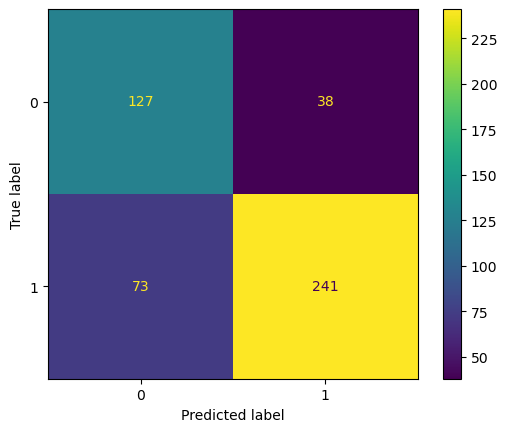

In [50]:

display = ConfusionMatrixDisplay(confusion_matrix(train_y,train_pred_sampled,labels=[1,0]))
display.plot()

In [51]:
from sklearn.base import BaseEstimator, ClassifierMixin

class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        proba = self.model.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

In [52]:
tuned_model = Pipeline(
    steps = [ ('imputer', SimpleImputer(strategy='mean') ),
              ('scaler', StandardScaler() ),
              ('balanced_sampling', RandomUnderSampler()),
              ('model', ThresholdClassifier(model=LogisticRegression(), threshold=0.45))
    ]
)
tuned_model.fit(train_x, train_y)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True
